In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [38]:
median_house_hold_in_come = pd.read_csv('Q:\\SparkDatasets\\simpledataset.csv', encoding="windows-1252")

In [39]:
median_house_hold_in_come.head(100)

,sirano,isim,yas,meslek,sehir,aylik_gelir
0,1,Cemal,35,Isci,Ankara,3500
1,2,Ceyda,42,Memur,Kayseri,4200
2,3,Timur,30,Muzisyen,Istanbul,9000
3,4,Burcu,29,Pazarlamaci,Ankara,4200
4,5,Yasemin,23,Pazarlamaci,Bursa,4800
5,6,Ali,33,Memur,Ankara,4250
6,7,Dilek,29,Pazarlamaci,Istanbul,7300
7,8,Murat,31,Muzisyen,Istanbul,12000
8,9,Ahmet,33,Doktor,Ankara,18000
9,10,Muhittin,46,Berber,Istanbul,12000


In [40]:
median_house_hold_in_come.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
sirano         15 non-null int64
isim           15 non-null object
yas            15 non-null int64
meslek         15 non-null object
sehir          15 non-null object
aylik_gelir    15 non-null int64
dtypes: int64(3), object(3)
memory usage: 800.0+ bytes


Text(0.5, 1.0, 'Poverty Rate Given States')

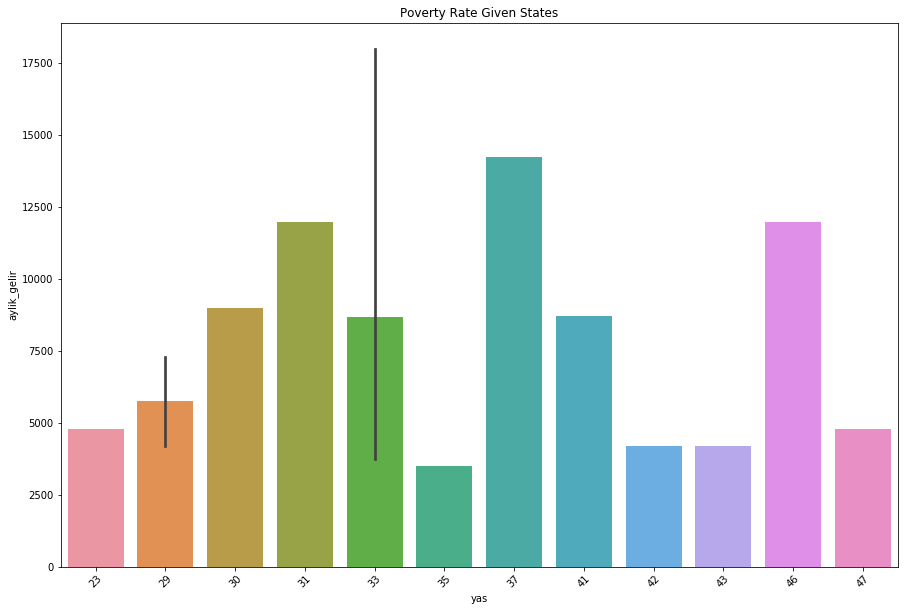

In [41]:

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=median_house_hold_in_come['yas'], y=median_house_hold_in_come['aylik_gelir'])
plt.xticks(rotation= 45)
plt.xlabel('yas')
plt.ylabel('aylik_gelir')
plt.title('Poverty Rate Given States')

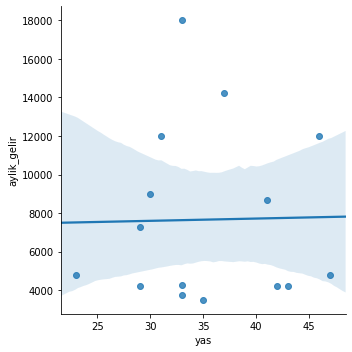

In [42]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="yas", y="aylik_gelir", data=median_house_hold_in_come)
plt.show()

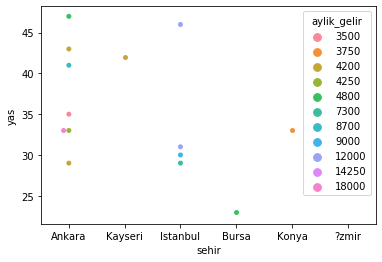

In [43]:
sns.swarmplot(x="sehir", y="yas",hue="aylik_gelir", data=median_house_hold_in_come)
plt.show()

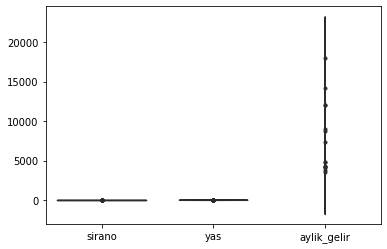

In [44]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=median_house_hold_in_come, palette=pal, inner="points")
plt.show()

# TRY

In [88]:
# Poverty rate of each state
# median_house_hold_in_come.yas.replace(['-'],0.0,inplace = True)
# median_house_hold_in_come.yas = median_house_hold_in_come.yas.astype(float)
age_list = list(median_house_hold_in_come['yas'].unique())
age_ratio = []
for i in age_list:
    x = median_house_hold_in_come[median_house_hold_in_come['yas']==i]
    age_rate = sum(x.yas)/len(x)
    age_ratio.append(age_rate)
data1 = pd.DataFrame({'age_list': age_list,'age_ratio':age_ratio})
new_index = (data1['age_ratio'].sort_values(ascending=False)).index.values
sorted_data = data1.reindex(new_index)

In [89]:
# Poverty rate of each state
# median_house_hold_in_come.aylik_gelir.replace(['-'],0.0,inplace = True)
#median_house_hold_in_come.aylik_gelir = median_house_hold_in_come.aylik_gelir.astype(float)
salary_list = list(median_house_hold_in_come['aylik_gelir'].unique())
salary_ratio = []
for i in salary_list:
    x = median_house_hold_in_come[median_house_hold_in_come['aylik_gelir']==i]
    salary_rate = sum(x.aylik_gelir)/len(x)
    salary_ratio.append(salary_rate)
data2 = pd.DataFrame({'salary_list': salary_list,'salary_ratio':salary_ratio})
new_index2 = (data2['salary_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data2.reindex(new_index2)

ValueError: Could not interpret input 'salary_list'

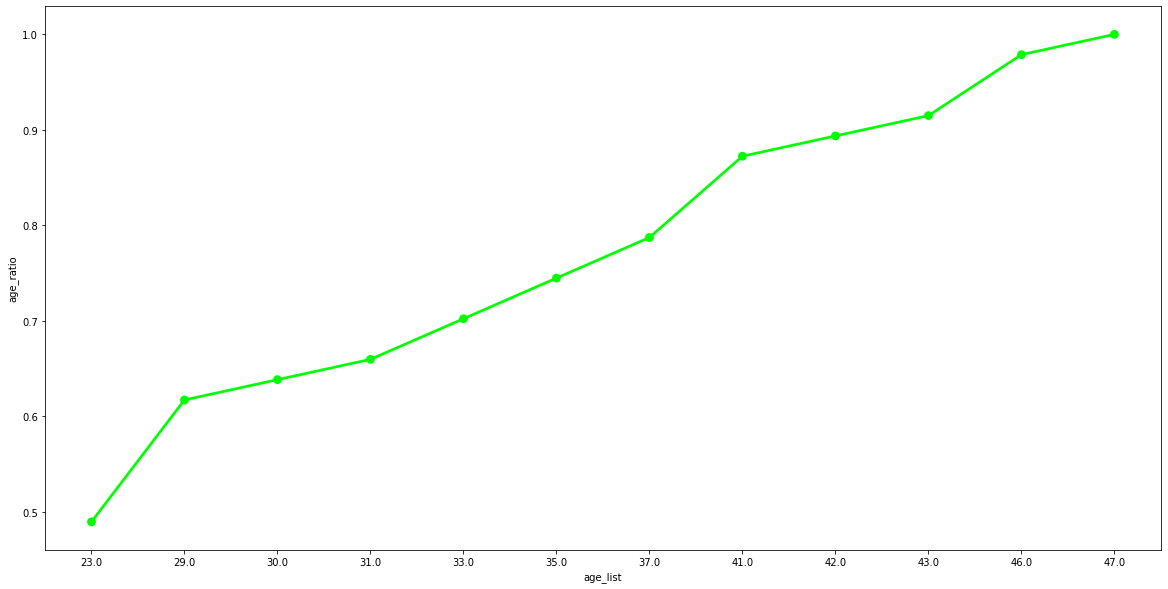

In [99]:
# high school graduation rate vs Poverty rate of each state
sorted_data['age_ratio'] = sorted_data['age_ratio']/max( sorted_data['age_ratio'])
sorted_data2['salary_ratio'] = sorted_data2['salary_ratio']/max( sorted_data2['salary_ratio'])
data = pd.concat([sorted_data,sorted_data2['salary_ratio']],axis=1)
data.sort_values('age_ratio',inplace=True)



# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='age_list',y='age_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='salary_list',y='salary_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'age ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'salary ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('Age',fontsize = 15,color='blue')
plt.ylabel('Salary',fontsize = 15,color='blue')
plt.title('Efficieny Age on Salary',fontsize = 20,color='blue')
plt.grid()